In [2]:
import cv2
import numpy as np
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

### __Cropping the images__

In [14]:
#loading original image
image0 = cv2.imread("combined1.png")

#from posting to description
croppedA = image0[0:2000, 0:1000]

#from balance
croppedB = image0[0:2000, 1380:1800]

### __Combining the images__

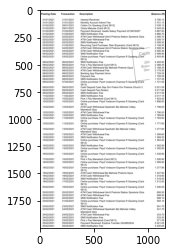

In [20]:
image_concat = cv2.hconcat([croppedA,croppedB])
cv2.imwrite('concat.png', image_concat)
added_image = cv2.imread("concat.png")
plt.imshow(added_image)


In [21]:
def extract_data(img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        t,threshed = cv2.threshold(img, 100, 255, cv2.THRESH_TOZERO)
        text1 = tess.image_to_data(threshed,output_type='data.frame')
        text2 = tess.image_to_string(threshed)
        #text = text1[text1.conf != -1]
        return text2

In [22]:
im = cv2.imread("concat.png")
data = extract_data(im)
arrValue = data.split("\n")

In [23]:
arrValue

['Posting Date Transaction Description Balance (R)',
 '',
 ' ',
 ' ',
 '  ',
 '',
 '31/01/2021 31/01/2021 Interest Received 3 706.13',
 '31/01/2021 31/01/2021 Monthly Account Admin Fee 3 701.13',
 '01/02/2021 29/01/2021 Cotton On Gauteng (Card 5813) 3 338.13',
 '01/02/2021 29/01/2021 Clicks Mahube (Card 5813) 3 242.50',
 '01/02/2021 01/02/2021 Payment Received: 4walls Salary Payment 2218618207 3 867.50',
 '01/02/2021 01/02/2021 SMS Notification Fee 3 866.70',
 '02/02/2021 02/02/2021 ATM Cash Withdrawal Atm3 Pretoria Station Spretoria Gtza 3 366.70',
 '02/02/2021 02/02/2021 ATM Cash Withdrawal Fee 3 358.70',
 '02/02/2021 02/02/2021 SMS Notification Fee 3 358.30',
 '03/02/2021 01/02/2021 Recurring Card Purchase: Rain Bryanston (Card 5813) 3 108.30',
 '04/02/2021 04/02/2021 ATM Cash Withdrawal Atm3 Pretoria Station Spretori: 2 508.30',
 '04/02/2021 04/02/2021 ATM Cash Withdrawal Fee . 2 500.30',
 '04/02/2021 04/02/2021 SMS Notification Fee Capit 2 499.90',
 '05/02/2021 03/02/2021 Online p